In [1]:
from tensorflow.keras.datasets.fashion_mnist import load_data
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
import keras


/Users/sourav/Documents/4.1/AI/myenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
def display_img(img_set, title_set):
  n = len(title_set)
  for i in range(n):
    plt.subplot(3, 3, i + 1)
    plt.imshow(img_set[i], cmap = 'gray')
    plt.title(title_set[i])
  plt.show()
  plt.close()


trainX.shape: (60000, 28, 28), trainY.shape: (60000,), testX.shape: (10000, 28, 28), testY.shape: (10000,))
trainX.dtype: uint8, trainY.dtype: uint8, testX.dtype: uint8, testY.dtype: uint8
trainX.Range: 255 - 0, testX.Range: 255 - 0


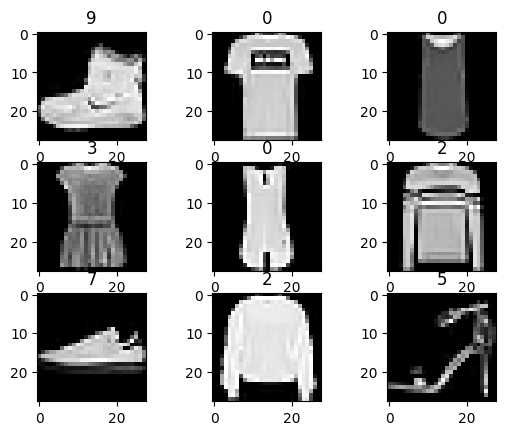

In [3]:
# Load data
(trainX, trainY), (testX, testY) = load_data()

# Investigate loaded data
print('trainX.shape: {}, trainY.shape: {}, testX.shape: {}, testY.shape: {})'.format(trainX.shape, trainY.shape, testX.shape, testY.shape))
print('trainX.dtype: {}, trainY.dtype: {}, testX.dtype: {}, testY.dtype: {}'.format(trainX.dtype, trainY.dtype, testX.dtype, testY.dtype))
print('trainX.Range: {} - {}, testX.Range: {} - {}'.format(trainX.max(), trainX.min(), testX.max(), testX.min()))

# Dispaly some loaded image data
display_img(trainX[:9], trainY[:9])

In [4]:
# Turn 2D images into 3D so that trainX and TrainY will be 4D since Convolutional layer takes 4D data as input.
trainX = np.expand_dims(trainX, axis = -1)
testX = np.expand_dims(testX, axis = -1)

# Investigate updated x
print('trainX.shape: {}, testX.shape: {})'.format(trainX.shape, testX.shape))
print('trainX.dtype: {}, testX.dtype: {}'.format(trainX.dtype, testX.dtype))
print('trainX.Range: {} - {}, testX.Range: {} - {}'.format(trainX.max(), trainX.min(), testX.max(), testX.min()))

# Turn y into one-hot-encoding, so that we can use 10 neurons in the output layer
trainY = to_categorical(trainY, num_classes = 10)
testY = to_categorical(testY, num_classes = 10)

# Investigate updated y
print('trainY.shape: {}, testY.shape: {})'.format(trainY.shape, testY.shape))
print('trainY.dtype: {}, testX.dtype: {}'.format(trainY.dtype, testY.dtype))
print(trainY[:5])


trainX.shape: (60000, 28, 28, 1), testX.shape: (10000, 28, 28, 1))
trainX.dtype: uint8, testX.dtype: uint8
trainX.Range: 255 - 0, testX.Range: 255 - 0
trainY.shape: (60000, 10), testY.shape: (10000, 10))
trainY.dtype: float64, testX.dtype: float64
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [5]:

trainX = trainX.astype("float32") / 255
testX = testX.astype("float32") / 255

In [6]:
inputs = Input((28, 28, 1), name = 'InputLayer')
x = Conv2D(16, kernel_size=3,  activation="relu")(inputs)
x = MaxPooling2D()(x)
x = Conv2D(32, kernel_size=3, activation="relu")(x)
x = MaxPooling2D()(x)
x = Flatten()(x)
x = Dense(512, activation = 'relu')(x)
outputs = Dense(10, name = 'OutputLayer', activation = 'softmax')(x)
model = Model(inputs, outputs, name = 'Multi-Class-Classifier')
model.summary()

Model: "Multi-Class-Classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ InputLayer (InputLayer)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       410,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 420,042 (1.60 MB)

 Trainable params: 420,042 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:

model.compile(optimizer="rmsprop", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(trainX, trainY, batch_size = 128, validation_split = 0.1, epochs = 10)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 61ms/step - accuracy: 0.7138 - loss: 0.8022 - val_accuracy: 0.8490 - val_loss: 0.4142
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 59ms/step - accuracy: 0.8586 - loss: 0.3846 - val_accuracy: 0.8765 - val_loss: 0.3343
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 60ms/step - accuracy: 0.8815 - loss: 0.3196 - val_accuracy: 0.8795 - val_loss: 0.3226
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 60ms/step - accuracy: 0.8963 - loss: 0.2833 - val_accuracy: 0.8915 - val_loss: 0.3005
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.9024 - loss: 0.2611 - val_accuracy: 0.8918 - val_loss: 0.2922
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 34s 81ms/step - accuracy: 0.9105 - loss: 0.2356 - val_accuracy: 0.8902 - val_loss: 0.2844
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 90ms/step - accuracy: 0.9177 - loss: 0.2203 - val_accuracy: 0.9080 - val_loss: 0.2513
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 30s 72ms/step - accuracy: 0.9240 - loss: 0.2017 - 